### imblearn para desbalanceo de clases

En muchos problemas de _machine learning_, especialmente en clasificación, nos encontramos con conjuntos de datos en los que una clase (llamada **minoritaria**) tiene un número mucho menor de muestras comparada con la otra u otras clases (llamadas **mayoritarias**). Por ejemplo, un escenario clásico es la detección de fraude en tarjetas de crédito: la gran mayoría de las transacciones son legítimas (clase mayoritaria), mientras que las transacciones fraudulentas (clase minoritaria) constituyen un porcentaje muy pequeño.

Cuando los modelos de clasificación se entrenan con datos desbalanceados, pueden inclinarse en exceso a predecir siempre la clase mayoritaria, ya que estadísticamente "aciertan" la mayoría de las veces. Esto puede reducir de forma drástica la capacidad para detectar adecuadamente la clase de interés (a menudo la minoritaria), que en muchos casos es la más importante (p. ej., detectar fraudes, enfermedades, etc.).

**SMOTE** son las siglas de **Synthetic Minority Over-sampling TEchnique**. 

Se trata de una técnica de **_oversampling_** que genera nuevas muestras sintéticas de la clase minoritaria para aumentar su frecuencia en el dataset, con el objetivo de balancear mejor las clases.

**Cómo funciona**:

- Identifica cada muestra de la clase minoritaria y localiza a sus vecinos más cercanos (según una métrica de distancia, típicamente la euclidiana).
- Selecciona de forma aleatoria algunos de estos vecinos y, a partir de ellos, genera nuevos ejemplos **interpolando** entre la muestra original y el vecino.  
    > Esto significa que las características de las nuevas muestras se calculan como un punto situado en la línea que une la muestra original y su vecino.

- De esta manera, no se duplican simplemente las muestras minoritarias (como haría un _Random Oversampling_) sino que se generan ejemplos intermedios (sintéticos), lo que en muchos casos mejora la diversidad de la clase minoritaria y ayuda al modelo a generalizar mejor.

Ejemplos:

* from iblearn.over_sampling import SMOTE
* from iblearn.under_sampling import RandomUnderSampler

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### SMOTE sobre datos demo make_classification

In [2]:

import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [20]:
X, y = make_classification(
    n_samples=300, # número total de filas
    n_features=2, # número total de columnas en la X
    n_redundant=0, # número de columnas redundantes
    n_clusters_per_class=1,
    n_informative=2,
    weights=[0.95, 0.05], # datos desbalanceados
    class_sep=3,
    random_state=42
)

print(X[:5])
print(y[:50])
print(np.bincount(y)) # cuenta cuántos 0 y 1 hay

[[ 2.73324554 -3.43100684]
 [ 3.14555473 -2.82480677]
 [ 2.53798312 -4.05654971]
 [ 3.39457591 -2.18326309]
 [ 2.72012412  2.97723685]]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[285  15]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Tamaño X_train", X_train.shape)
print("Distribución clases train:", np.bincount(y_train))
print("Tamaño X_test", X_test.shape)
print("Distribución clases test:", np.bincount(y_test))

Tamaño X_train (240, 2)
Distribución clases train: [228  12]
Tamaño X_test (60, 2)
Distribución clases test: [57  3]


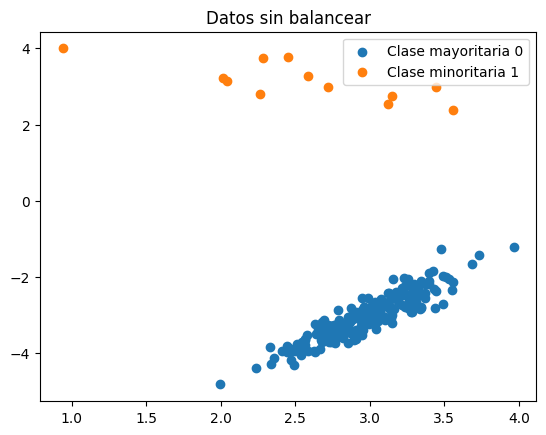

In [22]:
# Mostrar los puntos para la clase 0
plt.scatter(X_train[y_train == 0, 0],X_train[y_train == 0, 1], label="Clase mayoritaria 0")

# Mostrar los puntos para la clase 1
plt.scatter(X_train[y_train == 1, 0],X_train[y_train == 1, 1], label="Clase minoritaria 1")
plt.title("Datos sin balancear")
plt.legend()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



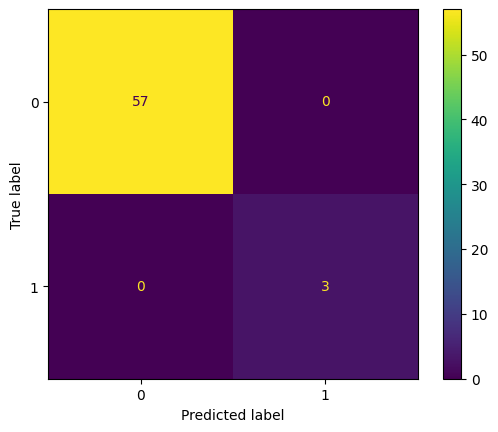

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [24]:
# Con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Tamaño X_train", X_train.shape)
print("Distribución clases train:", np.bincount(y_train))

print("\nTamaño X_train_resampled", X_train_resampled.shape)
print("Distribución clases y_train_resampled:", np.bincount(y_train_resampled))

Tamaño X_train (240, 2)
Distribución clases train: [228  12]

Tamaño X_train_resampled (456, 2)
Distribución clases y_train_resampled: [228 228]


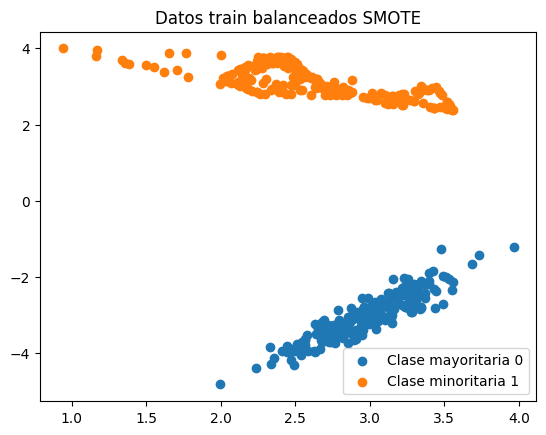

In [25]:
# Mostrar los puntos para la clase 0
plt.scatter(X_train_resampled[y_train_resampled == 0, 0],X_train_resampled[y_train_resampled == 0, 1], label="Clase mayoritaria 0")

# Mostrar los puntos para la clase 1
plt.scatter(X_train_resampled[y_train_resampled == 1, 0],X_train_resampled[y_train_resampled == 1, 1], label="Clase minoritaria 1")
plt.title("Datos train balanceados SMOTE")
plt.legend()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



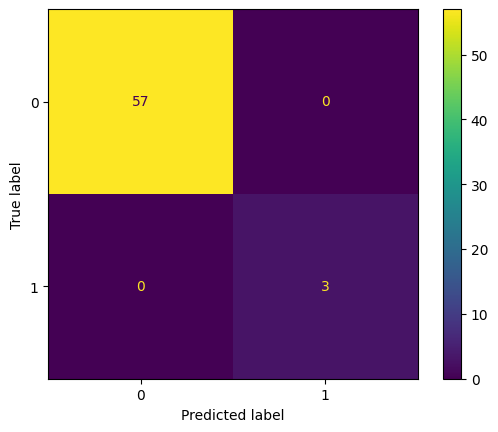

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled) # Entrenar con datos balanceados SMOTE
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [27]:
# wine
import pandas as pd 
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


<Axes: xlabel='target', ylabel='count'>

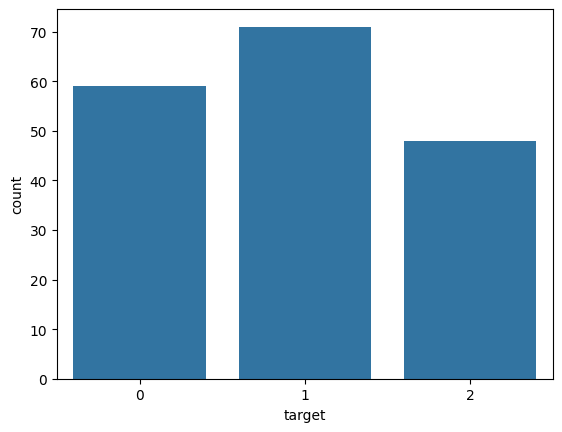

In [28]:
import seaborn as sns 
sns.countplot(df, x="target")

In [29]:
# penguins
df = sns.load_dataset("penguins").dropna()
df.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [30]:
print(df["island"].value_counts()) # island tiene más balanceo
print(df["species"].value_counts())

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


In [31]:
X= df.drop("island", axis=1)
X = pd.get_dummies(X)
y = df["island"].map({"Biscoe":0, "Dream": 1, "Torgersen": 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [32]:
# Sin SMOTE
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.67      0.78      0.72        37
           2       0.40      0.14      0.21        14

    accuracy                           0.72       100
   macro avg       0.62      0.59      0.58       100
weighted avg       0.69      0.72      0.70       100



c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# con SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression(max_iter=5000)
model.fit(X_train_resampled, y_train_resampled) 
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred)) # Se observa mejora en todas las métricas, 88, 79, 48

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        49
           1       1.00      0.65      0.79        37
           2       0.36      0.86      0.51        14

    accuracy                           0.77       100
   macro avg       0.77      0.78      0.73       100
weighted avg       0.89      0.77      0.80       100



c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SMOTE con Pipelines

Usa pipelines **imblearn** en lugar de sklearn ya que permiten modificar tanto la "X" como la "y" y pasarlas a la siguiente fase, en cambio scikit solo modifica la "X" de una fase a otra.

In [ ]:
# Con pipeline
# IMPORTANTE: usa imblearn
from imblearn.pipeline import Pipeline, make_pipeline

pipeline = make_pipeline(
    LogisticRegression(max_iter=5000)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.67      0.78      0.72        37
           2       0.40      0.14      0.21        14

    accuracy                           0.72       100
   macro avg       0.62      0.59      0.58       100
weighted avg       0.69      0.72      0.70       100



c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        49
           1       1.00      0.65      0.79        37
           2       0.34      0.79      0.48        14

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.72       100
weighted avg       0.87      0.76      0.79       100



c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        49
           1       0.83      0.68      0.75        37
           2       0.34      0.71      0.47        14

    accuracy                           0.75       100
   macro avg       0.72      0.74      0.70       100
weighted avg       0.83      0.75      0.78       100

